In [7]:
import pandas as pd
import joblib

# Load saved files from 02_cleaning
df = pd.read_csv("df_unencoded.csv")
y_pred = joblib.load("y_pred.pkl")
y_test = joblib.load("y_test.pkl")


In [8]:
from sklearn.model_selection import train_test_split

df_demo = df.copy().reset_index(drop=True)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    df_demo, df_demo['readmit_30'], test_size=0.2, random_state=42, stratify=df_demo['readmit_30']
)

fairness_df = X_test_full[['race', 'gender']].copy()
fairness_df['actual'] = y_test.values
fairness_df['predicted'] = y_pred


In [9]:
race_metrics = subgroup_metrics(fairness_df, 'race')
gender_metrics = subgroup_metrics(fairness_df, 'gender')


In [10]:
def subgroup_metrics(df, group_col):
    groups = df[group_col].unique()
    results = []

    for group in groups:
        subset = df[df[group_col] == group]
        tp = ((subset['actual'] == 1) & (subset['predicted'] == 1)).sum()
        tn = ((subset['actual'] == 0) & (subset['predicted'] == 0)).sum()
        fp = ((subset['actual'] == 0) & (subset['predicted'] == 1)).sum()
        fn = ((subset['actual'] == 1) & (subset['predicted'] == 0)).sum()

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        fnr = fn / (tp + fn) if (tp + fn) > 0 else 0
        acc = (tp + tn) / len(subset)

        results.append({
            group_col: group,
            'accuracy': round(acc, 3),
            'recall': round(recall, 3),
            'false_negative_rate': round(fnr, 3),
            'support': len(subset)
        })

    return pd.DataFrame(results)


In [11]:
race_metrics = subgroup_metrics(fairness_df, 'race')
gender_metrics = subgroup_metrics(fairness_df, 'gender')


C:\Users\kanel\AppData\Local\Temp\ipykernel_14200\1497938183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race", y="false_negative_rate", data=race_metrics, palette="coolwarm")


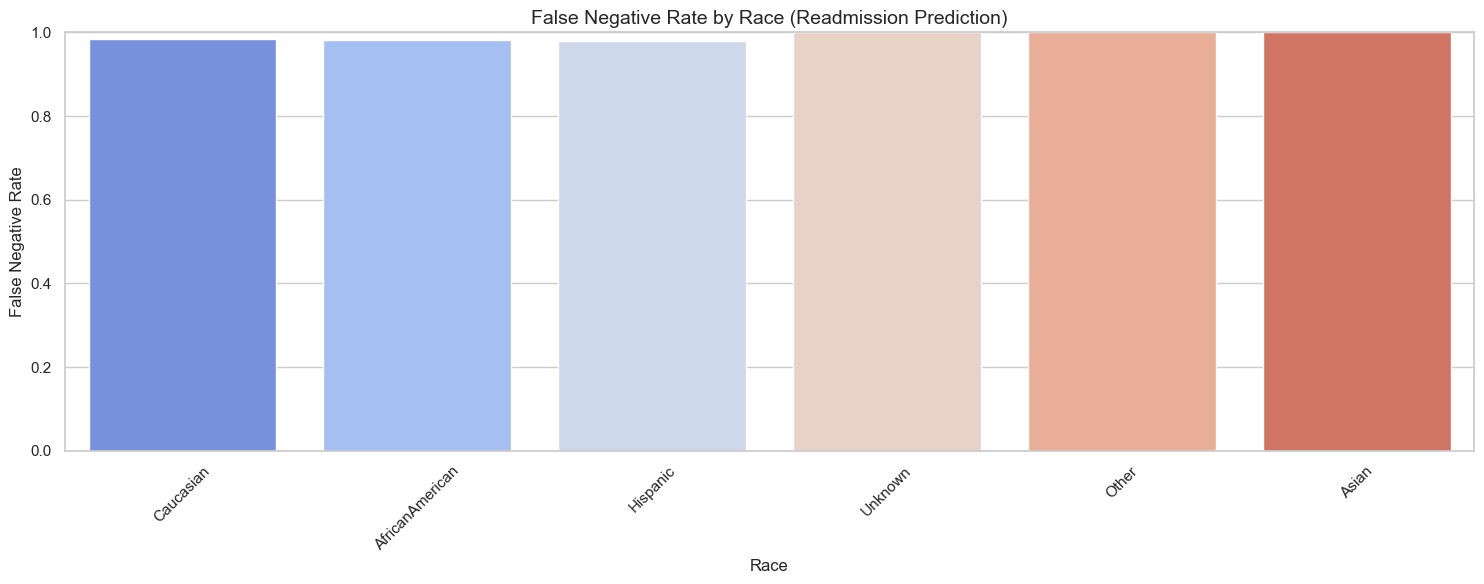

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.barplot(x="race", y="false_negative_rate", data=race_metrics, palette="coolwarm")
plt.title("False Negative Rate by Race (Readmission Prediction)", fontsize=14)
plt.ylabel("False Negative Rate")
plt.xlabel("Race")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kanel\AppData\Local\Temp\ipykernel_14200\915774629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="recall", data=gender_metrics, palette="pastel")


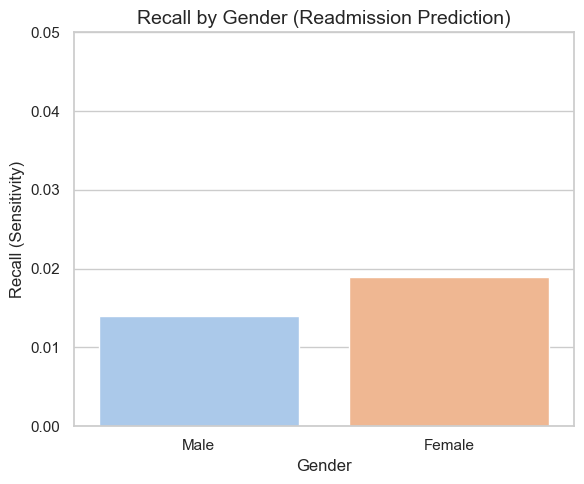

In [14]:
plt.figure(figsize=(6, 5))
sns.barplot(x="gender", y="recall", data=gender_metrics, palette="pastel")
plt.title("Recall by Gender (Readmission Prediction)", fontsize=14)
plt.ylabel("Recall (Sensitivity)")
plt.xlabel("Gender")
plt.ylim(0, 0.05)
plt.tight_layout()
plt.show()
